Autoencoder on MNIST digit

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras import Model
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredLogarithmicError
from keras import layers, losses
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

2022-12-12 00:38:40.010153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


Displaying Original Digit

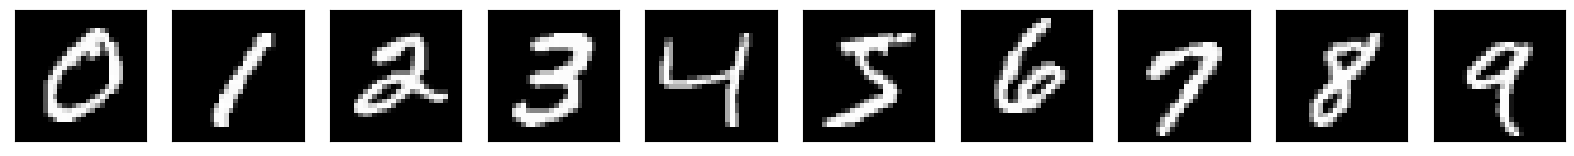

In [8]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(tf.squeeze(train_X[np.where(train_y==i)][0]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [11]:
dim = 32
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

ae = Autoencoder(dim)
ae.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [12]:
history_ae = ae.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0317 - val_loss: 0.0162
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

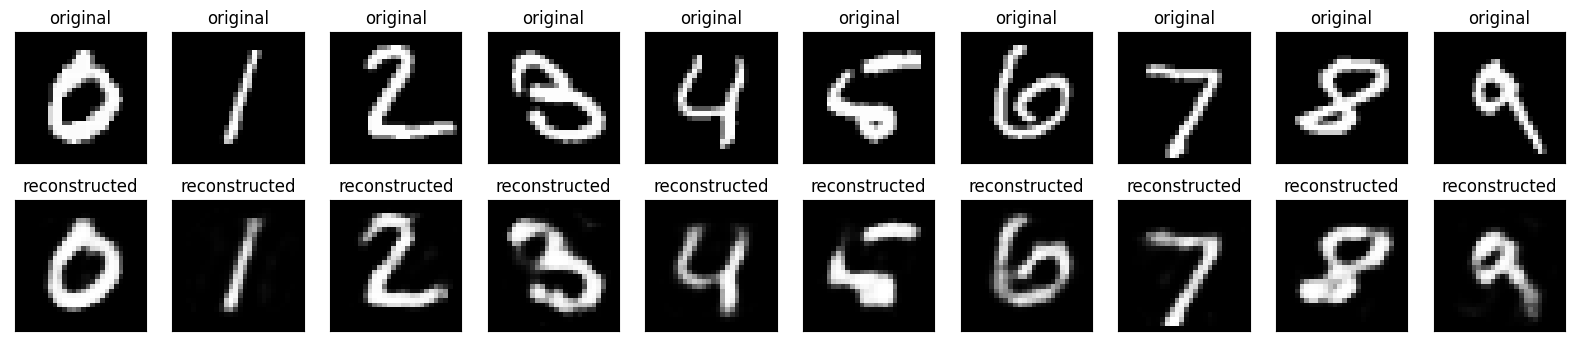

In [17]:
ae_encoded_img = ae.encoder(test_X).numpy()
ae_decoded_img = ae.decoder(ae_encoded_img).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(test_X[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(ae_decoded_img[np.where(test_y==i)][0]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
noise = 0.3
train_X_noisy = train_X + noise * tf.random.normal(shape=train_X.shape) 
test_X_noisy = test_X + noise * tf.random.normal(shape=test_X.shape) 

train_X_noisy = tf.clip_by_value(train_X_noisy, clip_value_min=0., clip_value_max=1.).numpy()
test_X_noisy = tf.clip_by_value(test_X_noisy, clip_value_min=0., clip_value_max=1.).numpy()

Displaying Noisy Digit

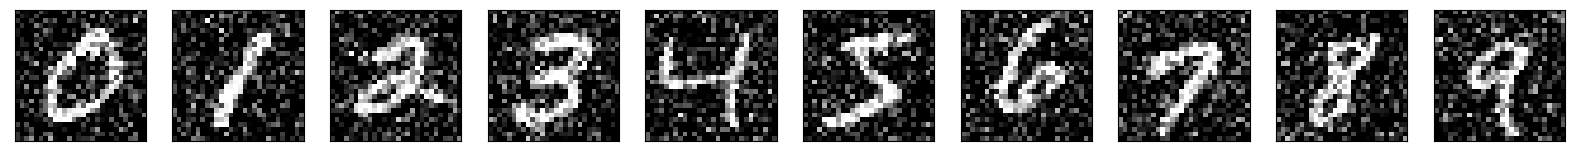

In [23]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(tf.squeeze(train_X_noisy[np.where(train_y==i)][0]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

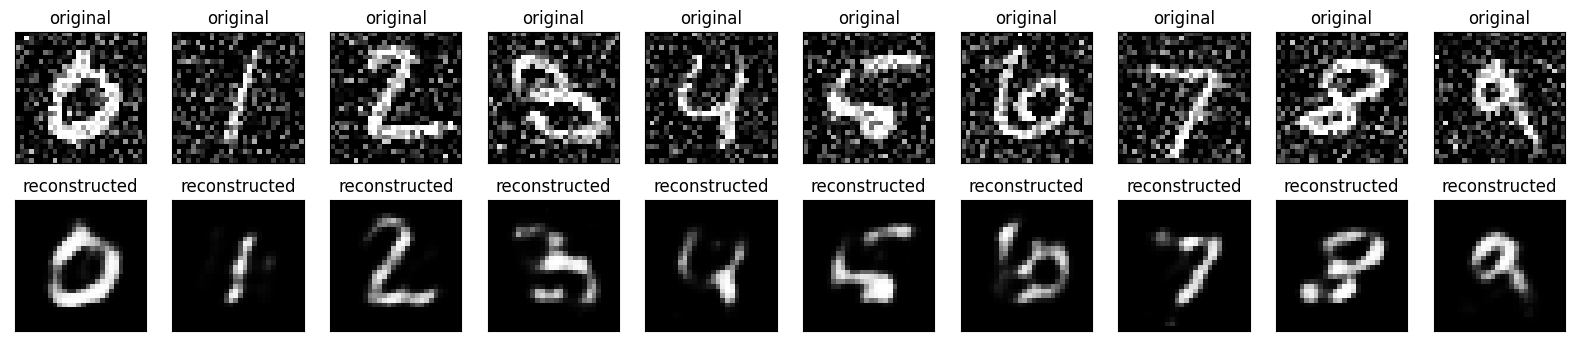

In [53]:
ae_noisy_encoded_img = ae.encoder(test_X_noisy).numpy()
ae_noisy_decoded_img = ae.decoder(ae_noisy_encoded_img).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(test_X_noisy[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(ae_noisy_decoded_img[np.where(test_y==i)][0]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
print("Average MSE for normal images: " + str(np.mean((ae_decoded_img - test_X) ** 2)))
print("Average MSE for anormalous images: " + str(np.mean((ae_noisy_decoded_img - test_X_noisy) ** 2)))

Average MSE for normal images: 0.009909993
Average MSE for anormalous images: 0.06962869


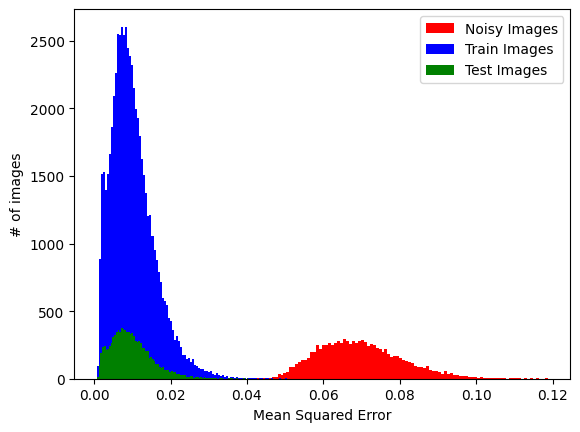

In [39]:
train_encoded_img = ae.encoder(train_X).numpy()
train_decoded_img = ae.decoder(train_encoded_img).numpy()
noise_loss = (ae_noisy_decoded_img - test_X_noisy) ** 2
noise_loss = np.mean(noise_loss, axis=1)
noise_loss = np.mean(noise_loss, axis=1)
plt.hist(noise_loss, bins=100, color='red')
train_loss = (train_decoded_img - train_X) ** 2
train_loss = np.mean(train_loss, axis=1)
train_loss = np.mean(train_loss, axis=1)
plt.hist(train_loss, bins=100, color='blue')
test_loss = (ae_decoded_img - test_X) ** 2
test_loss = np.mean(test_loss, axis=1)
test_loss = np.mean(test_loss, axis=1)
plt.hist(test_loss, bins=100, color='green')
plt.xlabel("Mean Squared Error")
plt.ylabel("# of images")
plt.legend(["Noisy Images", "Train Images", "Test Images"])
plt.show()

Comparing different dimention for latent space

In [44]:
ae8 = Autoencoder(8)
ae8.compile(optimizer='adam', loss=losses.MeanSquaredError())
ae16 = Autoencoder(16)
ae16.compile(optimizer='adam', loss=losses.MeanSquaredError())
ae64 = Autoencoder(64)
ae64.compile(optimizer='adam', loss=losses.MeanSquaredError())
ae128 = Autoencoder(128)
ae128.compile(optimizer='adam', loss=losses.MeanSquaredError())
ae256 = Autoencoder(256)
ae256.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [45]:
his8 = ae8.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))
his16 = ae16.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))
his64 = ae64.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))
his128 = ae128.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))
his256 = ae256.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - val_loss: 0.0378
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0370 - val_loss: 0.0356
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0355 - val_loss: 0.0346
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0347 - val_loss: 0.0341
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0344 - val_loss: 0.0338
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - val_loss: 0.0337
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341 - val_loss: 0.0336
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0339 - val_loss: 0.0335
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.033

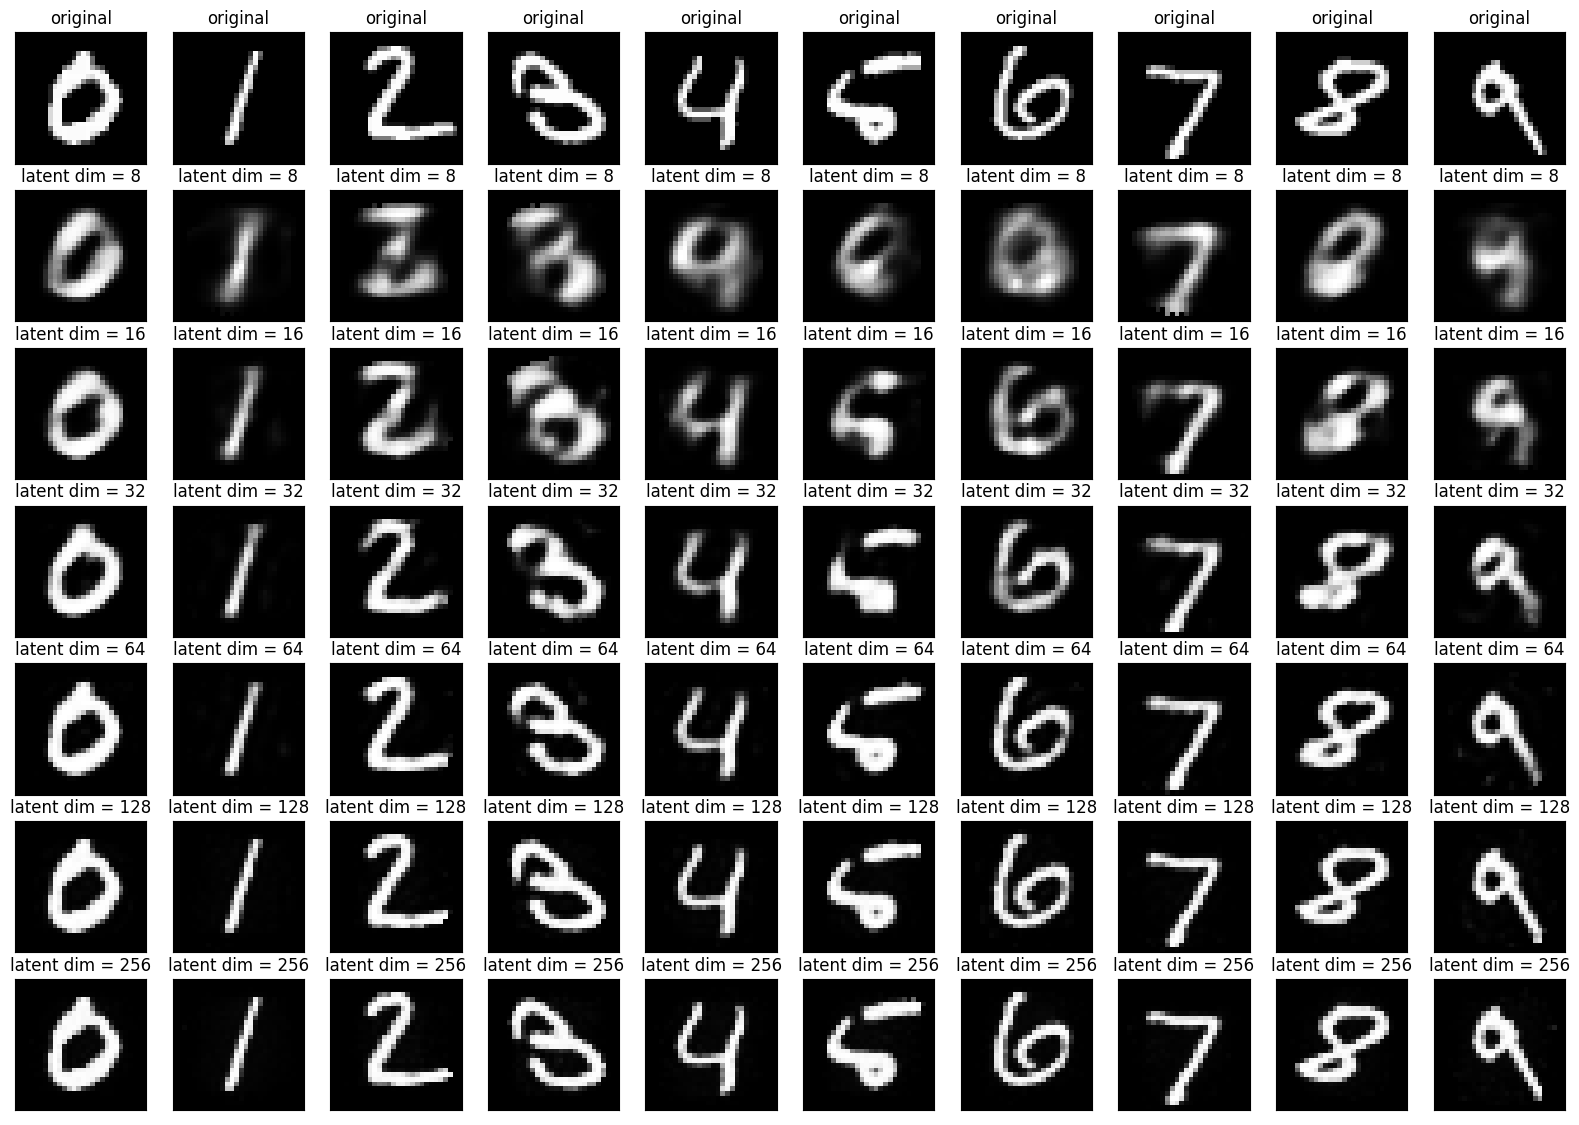

In [51]:
encoded_img_ae8 = ae8.encoder(test_X).numpy()
decoded_img_ae8 = ae8.decoder(encoded_img_ae8).numpy()
encoded_img_ae16 = ae16.encoder(test_X).numpy()
decoded_img_ae16 = ae16.decoder(encoded_img_ae16).numpy()
encoded_img_ae64 = ae64.encoder(test_X).numpy()
decoded_img_ae64 = ae64.decoder(encoded_img_ae64).numpy()
encoded_img_ae128 = ae128.encoder(test_X).numpy()
decoded_img_ae128 = ae128.decoder(encoded_img_ae128).numpy()
encoded_img_ae256 = ae256.encoder(test_X).numpy()
decoded_img_ae256 = ae256.decoder(encoded_img_ae256).numpy()

n = 10
plt.figure(figsize=(20, 14))
for i in range(n):
    ax = plt.subplot(7, n, i + 1)
    plt.imshow(tf.squeeze(test_X[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + n)
    plt.imshow(tf.squeeze(decoded_img_ae8[np.where(test_y==i)][0]))
    plt.title("latent dim = 8")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 2*n)
    plt.imshow(tf.squeeze(decoded_img_ae16[np.where(test_y==i)][0]))
    plt.title("latent dim = 16")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 3*n)
    plt.imshow(tf.squeeze(ae_decoded_img[np.where(test_y==i)][0]))
    plt.title("latent dim = 32")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 4*n)
    plt.imshow(tf.squeeze(decoded_img_ae64[np.where(test_y==i)][0]))
    plt.title("latent dim = 64")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 5*n)
    plt.imshow(tf.squeeze(decoded_img_ae128[np.where(test_y==i)][0]))
    plt.title("latent dim = 128")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 6*n)
    plt.imshow(tf.squeeze(decoded_img_ae256[np.where(test_y==i)][0]))
    plt.title("latent dim = 256")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

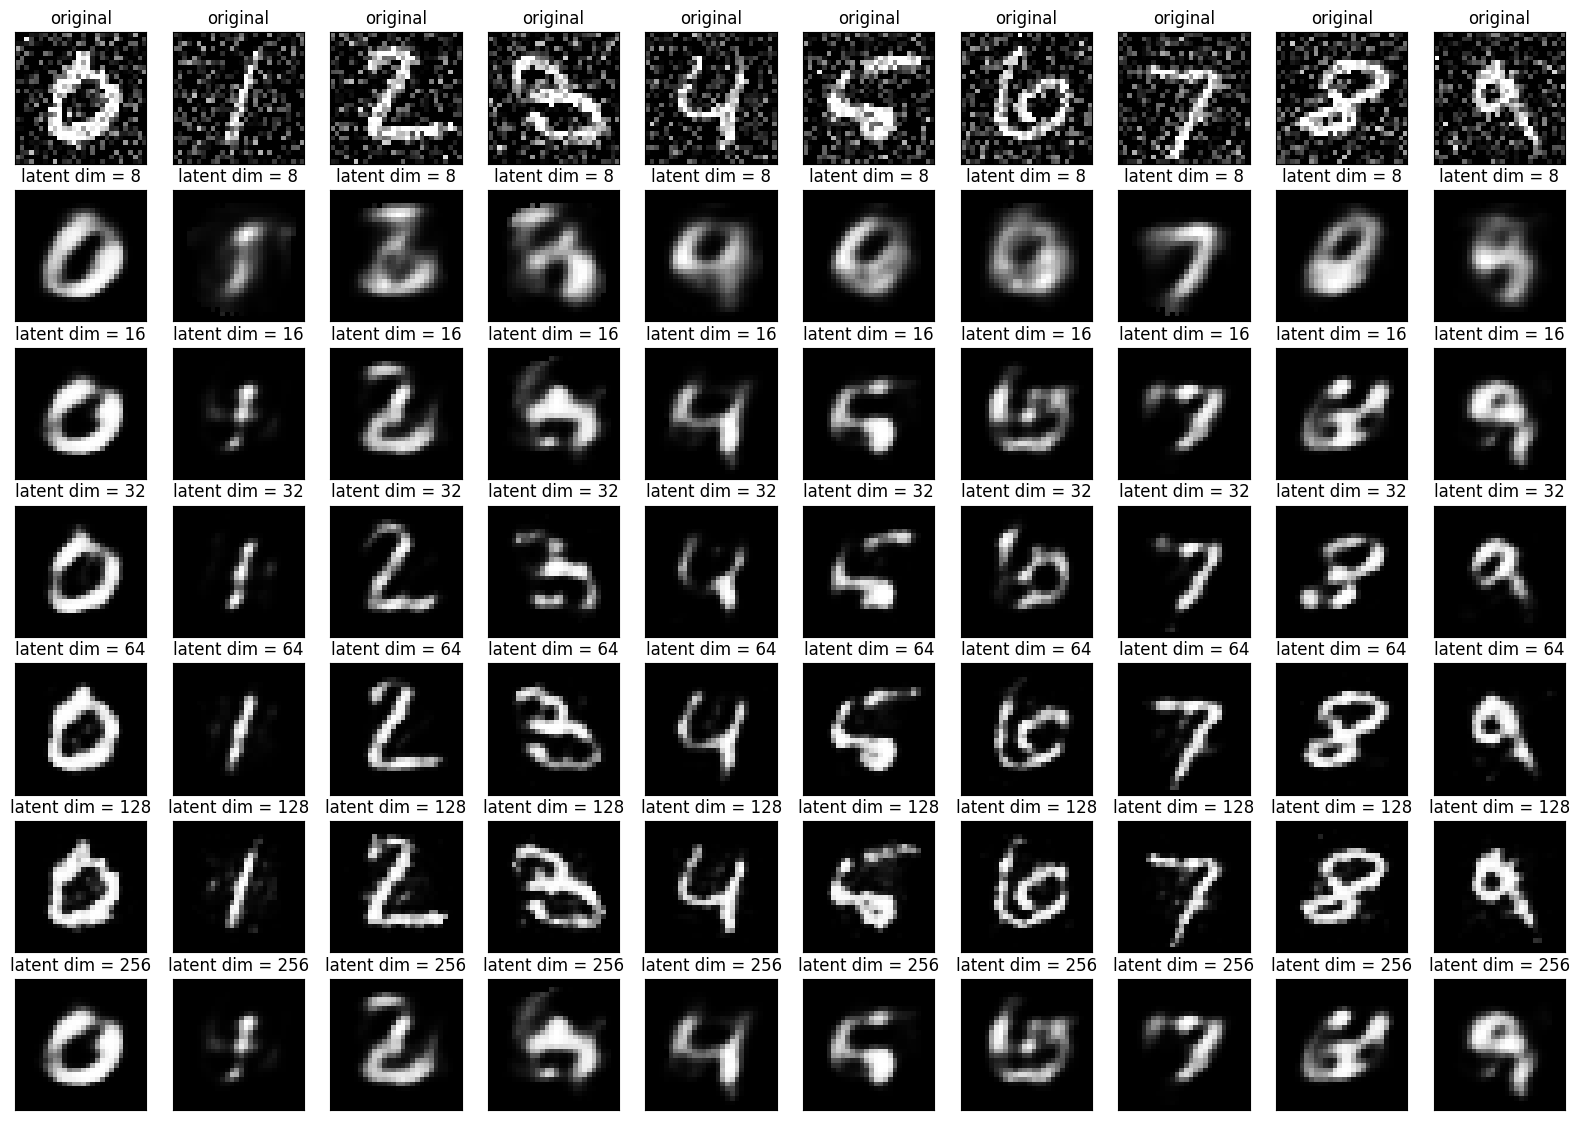

In [52]:
noisy_encoded_img_ae8 = ae8.encoder(test_X_noisy).numpy()
noisy_decoded_img_ae8 = ae8.decoder(noisy_encoded_img_ae8).numpy()
noisy_encoded_img_ae16 = ae16.encoder(test_X_noisy).numpy()
noisy_decoded_img_ae16 = ae16.decoder(noisy_encoded_img_ae16).numpy()
noisy_encoded_img_ae64 = ae64.encoder(test_X_noisy).numpy()
noisy_decoded_img_ae64 = ae64.decoder(noisy_encoded_img_ae64).numpy()
noisy_encoded_img_ae128 = ae128.encoder(test_X_noisy).numpy()
noisy_decoded_img_ae128 = ae128.decoder(noisy_encoded_img_ae128).numpy()
noisy_encoded_img_ae256 = ae16.encoder(test_X_noisy).numpy()
noisy_decoded_img_ae256 = ae16.decoder(noisy_encoded_img_ae256).numpy()

n = 10
plt.figure(figsize=(20, 14))
for i in range(n):
    ax = plt.subplot(7, n, i + 1)
    plt.imshow(tf.squeeze(test_X_noisy[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + n)
    plt.imshow(tf.squeeze(noisy_decoded_img_ae8[np.where(test_y==i)][0]))
    plt.title("latent dim = 8")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 2*n)
    plt.imshow(tf.squeeze(noisy_decoded_img_ae16[np.where(test_y==i)][0]))
    plt.title("latent dim = 16")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 3*n)
    plt.imshow(tf.squeeze(ae_noisy_decoded_img[np.where(test_y==i)][0]))
    plt.title("latent dim = 32")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 4*n)
    plt.imshow(tf.squeeze(noisy_decoded_img_ae64[np.where(test_y==i)][0]))
    plt.title("latent dim = 64")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 5*n)
    plt.imshow(tf.squeeze(noisy_decoded_img_ae128[np.where(test_y==i)][0]))
    plt.title("latent dim = 128")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(7, n, i + 1 + 6*n)
    plt.imshow(tf.squeeze(noisy_decoded_img_ae256[np.where(test_y==i)][0]))
    plt.title("latent dim = 256")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Different Autoencoder Model

In [7]:
class Multilayer(Model):
    def __init__(self):
        super(Multilayer, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3, 3), activation='tanh', padding='same', strides=2)
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

mlae = Multilayer()
mlae.compile(optimizer='adam', loss=losses.MeanSquaredError())

2022-12-12 00:39:15.064047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
mlae_history = mlae.fit(train_X, train_X, epochs=10, shuffle=True, validation_data=(test_X, test_X))

Epoch 1/10
1875/1875 [==============================] - 132s 69ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 8.8112e-04 - val_loss: 7.3845e-04
Epoch 3/10
1875/1875 [==============================] - 127s 68ms/step - loss: 6.6171e-04 - val_loss: 5.9212e-04
Epoch 4/10
1875/1875 [==============================] - 139s 74ms/step - loss: 5.6093e-04 - val_loss: 5.0932e-04
Epoch 5/10
1875/1875 [==============================] - 138s 74ms/step - loss: 5.0308e-04 - val_loss: 4.6816e-04
Epoch 6/10
1875/1875 [==============================] - 145s 77ms/step - loss: 4.6888e-04 - val_loss: 4.4191e-04
Epoch 7/10
1875/1875 [==============================] - 138s 73ms/step - loss: 4.4588e-04 - val_loss: 4.2690e-04
Epoch 8/10
1875/1875 [==============================] - 147s 78ms/step - loss: 4.2930e-04 - val_loss: 4.1543e-04
Epoch 9/10
1875/1875 [==============================] - 150s 80ms/step - loss: 4.1387e-04 - val_loss: 3.

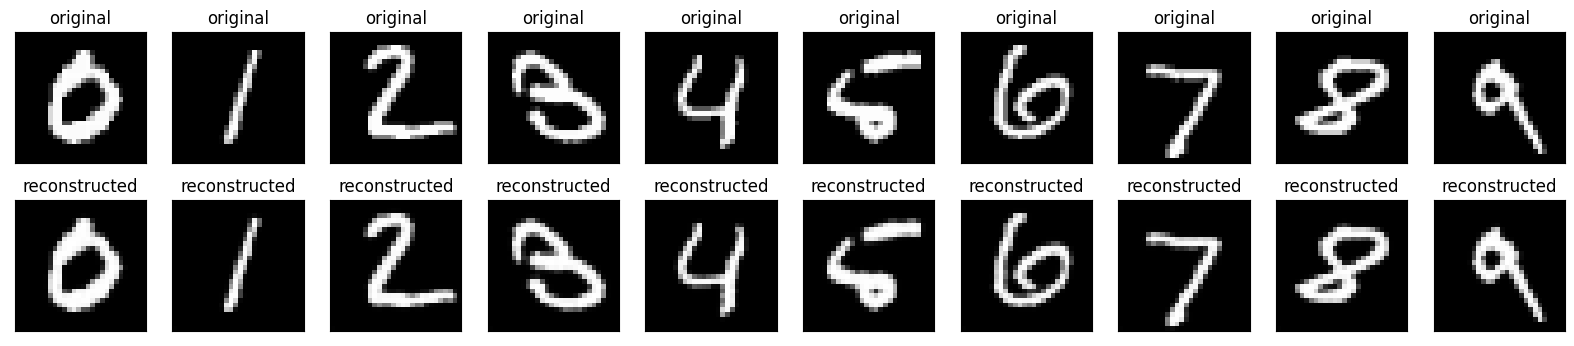

In [11]:
mlae_encoded_img = mlae.encoder(test_X).numpy()
mlae_decoded_img = mlae.decoder(mlae_encoded_img).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(test_X[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(mlae_decoded_img[np.where(test_y==i)][0]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

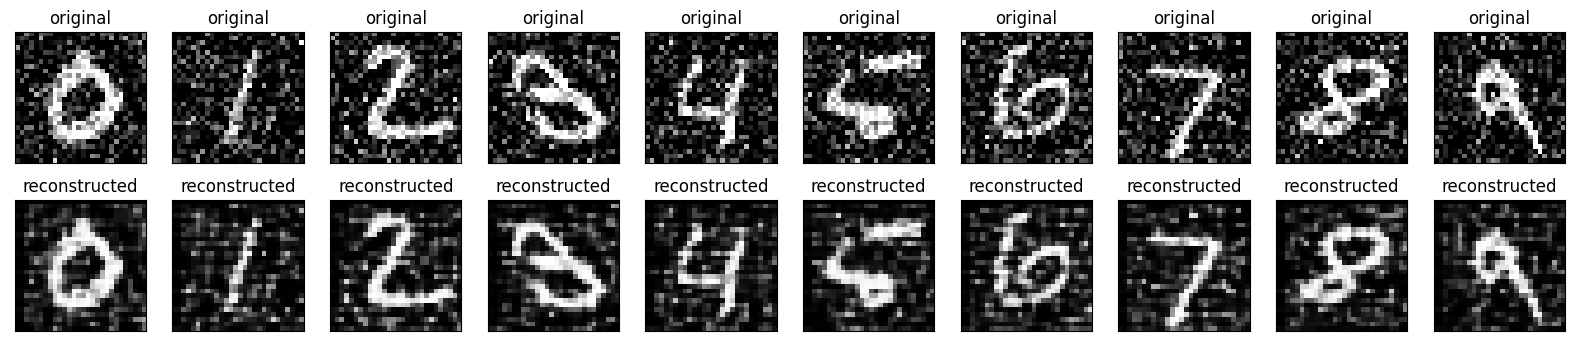

In [14]:
mlae_noisy_encoded_img = mlae.encoder(test_X_noisy).numpy()
mlae_noisy_decoded_img = mlae.decoder(mlae_noisy_encoded_img).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(test_X_noisy[np.where(test_y==i)][0]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(mlae_noisy_decoded_img[np.where(test_y==i)][0]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
print("Average MSE for normal images: " + str(np.mean((mlae_decoded_img[:,:,:,0] - test_X) ** 2)))
print("Average MSE for anormalous images: " + str(np.mean((mlae_noisy_decoded_img[:,:,:,0] - test_X_noisy) ** 2)))

Average MSE for normal images: 0.00038874935
Average MSE for anormalous images: 0.021301016


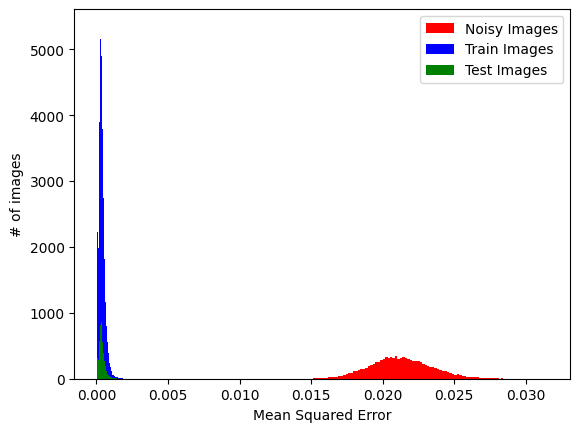

In [19]:
mlae_noise_loss = (mlae_noisy_decoded_img[:,:,:,0] - test_X_noisy) ** 2
mlae_noise_loss = np.mean(mlae_noise_loss, axis=1)
mlae_noise_loss = np.mean(mlae_noise_loss, axis=1)
mlae_train_encoded_img = mlae.encoder(train_X).numpy()
mlae_train_decoded_img = mlae.decoder(mlae_train_encoded_img).numpy()
plt.hist(mlae_noise_loss, bins=100, color='red')
mlae_train_loss = (mlae_train_decoded_img[:,:,:,0] - train_X) ** 2
mlae_train_loss = np.mean(mlae_train_loss, axis=1)
mlae_train_loss = np.mean(mlae_train_loss, axis=1)
plt.hist(mlae_train_loss, bins=100, color='blue')
mlae_test_loss = (mlae_decoded_img[:,:,:,0] - test_X) ** 2
mlae_test_loss = np.mean(mlae_test_loss, axis=1)
mlae_test_loss = np.mean(mlae_test_loss, axis=1)
plt.hist(mlae_test_loss, bins=100, color='green')
plt.xlabel("Mean Squared Error")
plt.ylabel("# of images")
plt.legend(["Noisy Images", "Train Images", "Test Images"])
plt.show()